<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2021 -->
# Project 1 on Machine Learning, deadline October 4, 2021
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 14, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

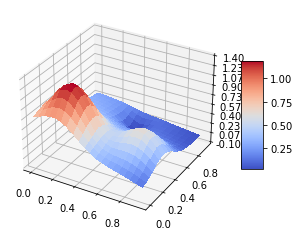

In [3]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Exercise 1: Ordinary Least Square (OLS) on the Franke function (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.



### Exercise 2: Bias-variance trade-off and resampling techniques (score 15 points)

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.

Note also that when you calculate the bias, in all applications you don't know the function values $f_i$. You would hence replace them with the actual data points $y_i$.


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


### Exercise 4: Ridge Regression on the Franke function  with resampling (score 20 points)

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. Perform the same bootstrap analysis as in the
Exercise 2  (for the same polynomials) and the cross-validation  in exercise 3 but now for different values of $\lambda$. Compare and
analyze your results with those obtained in exercises 1-3. Study the
dependence on $\lambda$.

Study also the bias-variance trade-off as function of various values of
the parameter $\lambda$. For the bias-variance trade-off, use the **bootstrap** resampling method. Comment your results. 

### Exercise 5: Lasso Regression on the Franke function  with resampling (Score 10 points))

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 

### Exercise 6: Analysis of real data  (score 30 points)

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

Here is a simple part of a Python code which reads and plots the data
from such files

In [ ]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.


Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.


Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).




## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here. 

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. Note that you can answer question by question and there is no need to structure your report as a scientific report with abstract, introduction, theory, results and discussions, conclusions etc. But you have the following elements in mind when you answer the various questions.


  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report. 



## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.